In [1]:
import pandas
df = pandas.read_excel('AmesHousing.xls')
df.head()

len(df)


2930

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn

df.plot(kind = 'scatter', x='Gr Liv Area', y='SalePrice')

### deal with the null rows


In [3]:

df1 = df.drop(['Fireplace Qu','Pool QC','Fence','Misc Feature','Alley'], 1)
# print(df1.isnull().sum().to_string())
df1["Lot Frontage"] = df1.groupby("PID").transform(lambda x: x.fillna(x.mean()))
print(df1.isnull().sum().to_string())




Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF 

In [4]:

df1 = df1.dropna()
print(len(df1))
print(df1.isnull().sum().to_string())

2678
Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Ful

# Groupby Neighborhood using mean()

In [5]:
df1.groupby('Neighborhood')['SalePrice'].mean()
print(df1.isnull().sum().to_string())

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

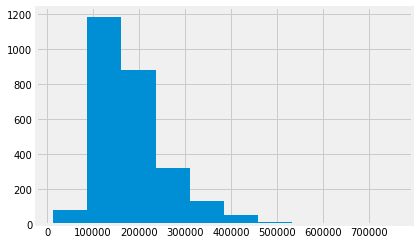

In [6]:
import numpy as np
df1['Skewed_SP'] = np.log(df1['SalePrice']+1)
plt.hist(df1.SalePrice)
plt.show()

/home/laqin/Work/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


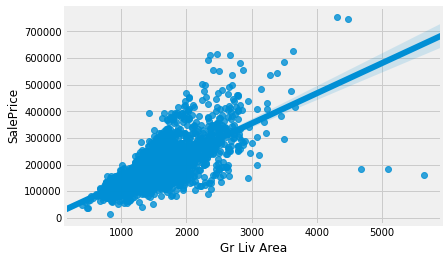

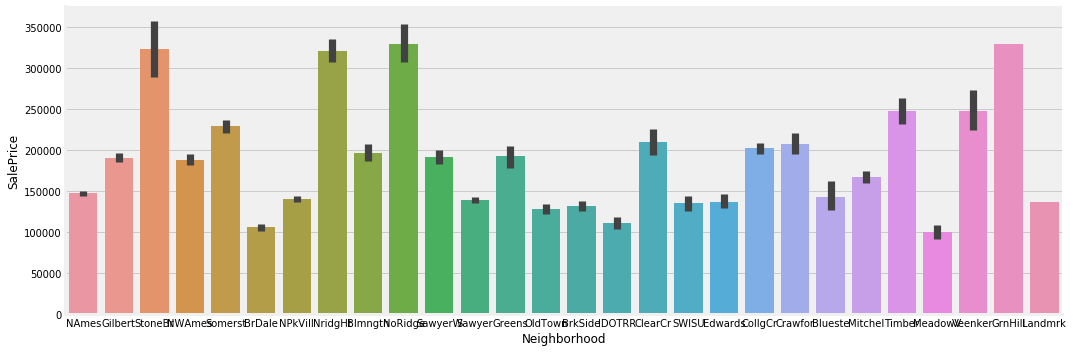

In [7]:

seaborn.regplot(x='Gr Liv Area',y='SalePrice',data=df1)

g = seaborn.factorplot(x='Neighborhood', y='SalePrice', data=df1, kind='bar', aspect=3)

### Address the problem how to collect appropriate features(cotrrelation)

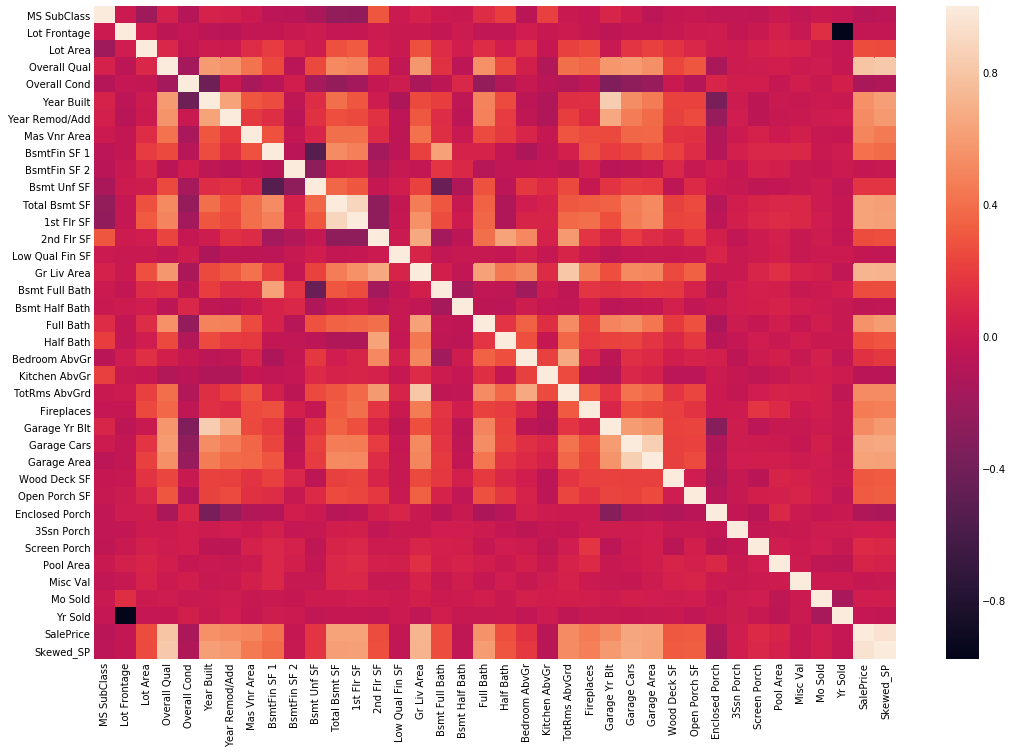

In [8]:
# features= df1[['MS SubClass','MS Zoning','Lot Frontage','Lot Area','Street','Lot Shape','SalePrice']]
features = df1.drop(['PID', 'Order'], axis = 1)

core = features.corr()
plt.figure(figsize = (16,12))
seaborn.heatmap(core, 
            xticklabels=core.columns.values,
            yticklabels=core.columns.values)

### Overall Qual, Lot Area, Yeal Built, Year Remod/Add, Mas Vnr Area, Bsmt Unf SF, Bsmtfin SF 1, Total Bsmt SF, 1st Flr SF, Gr Liv Area, Full Bath, Garage Area, Garage Cars, TotRms AbvGrd, Fireplaces, Garage Yr Blt 

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

df1.var()


Order              7.166304e+05
PID                3.550149e+16
MS SubClass        1.730532e+03
Lot Frontage       7.166304e+05
Lot Area           6.520642e+07
Overall Qual       1.831089e+00
Overall Cond       1.142782e+00
Year Built         8.723656e+02
Year Remod/Add     4.198309e+02
Mas Vnr Area       3.380636e+04
BsmtFin SF 1       2.092261e+05
BsmtFin SF 2       3.075350e+04
Bsmt Unf SF        1.899676e+05
Total Bsmt SF      1.667203e+05
1st Flr SF         1.526067e+05
2nd Flr SF         1.859629e+05
Low Qual Fin SF    1.790285e+03
Gr Liv Area        2.519998e+05
Bsmt Full Bath     2.722057e-01
Bsmt Half Bath     6.096689e-02
Full Bath          3.019850e-01
Half Bath          2.537055e-01
Bedroom AbvGr      6.234789e-01
Kitchen AbvGr      2.872602e-02
TotRms AbvGrd      2.358884e+00
Fireplaces         4.232744e-01
Garage Yr Blt      6.343729e+02
Garage Cars        4.264971e-01
Garage Area        3.574700e+04
Wood Deck SF       1.656537e+04
Open Porch SF      4.340603e+03
Enclosed

In [10]:
df2 = pandas.get_dummies(df1, columns=['Neighborhood'])
df3 = pandas.get_dummies(df2, columns=['Street'])

df3.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       ...
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl',
       'Street_Pave'],
      dtype='object', length=106)

# Build linear model

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor,SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit, KFold
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

y = df3.SalePrice
X = df3[ [ 'Overall Qual', 'Overall Cond', 'Year Built', 'TotRms AbvGrd', 'Bedroom AbvGr', 'Garage Cars', 'Yr Sold']]

# 'Neighborhood', 'Sale Condition'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), DecisionTreeRegressor(), Lasso(), ElasticNet(), SGDRegressor( max_iter=10)]
# models = [SGDRegressor( max_iter=10)]
for model in models:
    v = ShuffleSplit(n_splits=100, test_size=0.1)
    scores = cross_val_score(model, X_train, y_train, cv = v)
    print('average score:', sum(scores)/len(scores))



/home/laqin/Work/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


average score: 0.7132828091228879
average score: 0.7103846384603816
average score: 0.5748989333142258
average score: 0.7193746890731704
average score: 0.6916817022840535
average score: -2.3751338231585597e+21


In [12]:
y = df3.SalePrice
X = df3[ [ 'Overall Qual', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area','Garage Cars', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
         'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl','Street_Pave']]

# 'Neighborhood', 'Sale Condition'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), DecisionTreeRegressor(), Lasso(), ElasticNet(), SGDRegressor( max_iter=10)]
# models = [SGDRegressor( max_iter=10)]
for model in models:
    v = ShuffleSplit(n_splits=100, test_size=0.1)
    scores = cross_val_score(model, X_train, y_train, cv = v)
    print('average score:', sum(scores)/len(scores))

average score: 0.8135052241595123
average score: 0.831133802751681
average score: 0.7345276526276137
average score: 0.8220758632172647
average score: 0.8028828080588412
average score: -2.4689272491146567e+24


# Ridge can get the highest score

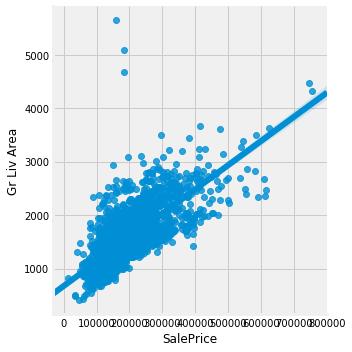

In [13]:
import seaborn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
# model.fit(X_train, y_train)
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))

seaborn.lmplot(x='SalePrice', y='Gr Liv Area', data = df3)

In [14]:
import seaborn


X = df3[ [ 'Overall Qual', 'Lot Area','Year Built']]
y = df3.SalePrice

model = LinearRegression()
# model.fit(X_train, y_train)
model.fit(X, y)


model.predict([[9,50, 2000]])

array([290653.09426031])

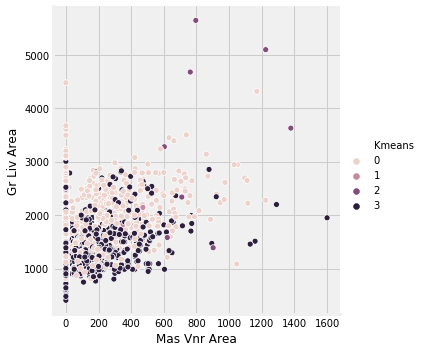

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn

model = KMeans(n_clusters=4)

X = df3[ [ 'Overall Qual', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area','Garage Cars', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
         'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl','Street_Pave']]

# X = df3[ [ 'Overall Qual', 'Lot Area','Year Built']]

# Now we do the clustering
model.fit(X)

#plot the clustering figure
df3['Kmeans'] = model.labels_

# r = [i for i in model.labels_ if i!=0]
# print(r)

seaborn.relplot( x='Mas Vnr Area', y ='Gr Liv Area', hue = 'Kmeans', data=df3)

# model.predict([[9,50, 2000]])

In [16]:
for k in range(2, 10):
    model = KMeans(n_clusters = k)
    model.fit(X)
    print('k = ', k, 'silhouette = ', silhouette_score(X, model.labels_, metric = 'euclidean'))

k =  2 silhouette =  0.9656116862594126
k =  3 silhouette =  0.7711009000890819
k =  4 silhouette =  0.45938339502653225
k =  5 silhouette =  0.4637585195782812
k =  6 silhouette =  0.4515816619743341
k =  7 silhouette =  0.45131891434199733
k =  8 silhouette =  0.4180287012002573
k =  9 silhouette =  0.41672893856006354


# Use principal component analysis (PCA) to reduce the dimensionality

0.7746180793197288


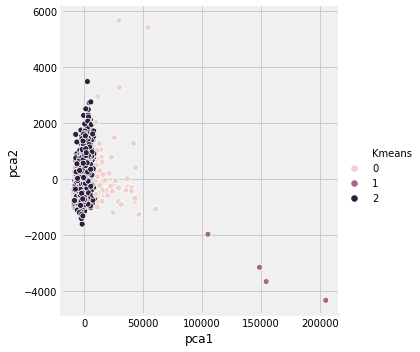

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components =3)
features  = df3[ [ 'Overall Qual', 'Lot Area','Year Built','Year Remod/Add', 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Garage Area','Garage Cars', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
         'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Street_Grvl','Street_Pave']]
X2 = pca.fit_transform(features)
df3['pca1'] = X2[:, 0]
df3['pca2'] = X2[:, 1]
df3['pca3'] = X2[:, 2]



model = KMeans(n_clusters = 3)

x = df3[['pca1', 'pca2', 'pca3']]
model.fit(x)

df3['Kmeans'] = model.labels_
print(silhouette_score(x, model.labels_))

seaborn.relplot(x='pca1', y = 'pca2', hue = 'Kmeans', data = df3)

# cross_val_score(LinearSVC(), df3[['pca1', 'pca2']], df3.SalePrice, cv = 5)

In [18]:
# y = df3.SalePrice
# model = LinearSVC()
# model.fit(x,y)


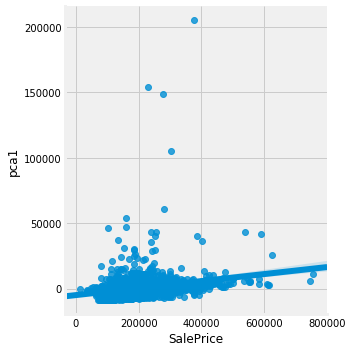

In [19]:
seaborn.lmplot(x='SalePrice', y='pca1', data = df3)

In [20]:
X = df3[['pca1', 'pca2']]
y= df3.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = [LinearRegression(), Ridge(), DecisionTreeRegressor(), Lasso(), ElasticNet(), SGDRegressor( max_iter=10)]
# models = [SGDRegressor( max_iter=10)]
for model in models:
    v = ShuffleSplit(n_splits=100, test_size=0.1)
    scores = cross_val_score(model, X_train, y_train, cv = v)
    print('average score:', sum(scores)/len(scores))

average score: 0.5608012380208228
average score: 0.557964250869124
average score: 0.2674530272663772
average score: 0.5772361793686133
average score: 0.5570654274256556
average score: -1.4290743363762277e+25


In [21]:
from sklearn import ensemble

data = df3.select_dtypes(include=[np.number]).interpolate().dropna()

y = np.log(data.SalePrice)
X = data.drop(['SalePrice', 'PID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
lr = LinearRegression()
# lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

model = lr.fit(X_train, y_train)
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


R^2 is: 
 0.999999999976482
RMSE is: 
 3.456806654198082e-12


Text(0.5,1,'Linear Regression Model')

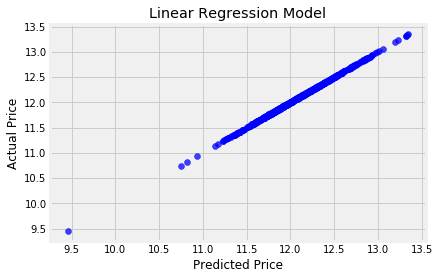

In [22]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()


## statistic

In [23]:
df3.head()
# df3.SalePrice

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Street_Grvl,Street_Pave,Kmeans,pca1,pca2,pca3
0,1,526301100,20,RL,1.0,31770,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,21524.810868,-295.838327,29.423505
1,2,526350040,20,RH,2.0,11622,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2,1357.433644,-717.970874,-79.771476
2,3,526351010,20,RL,3.0,14267,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2,4020.339195,-107.646304,-28.693545
3,4,526353030,20,RL,4.0,11160,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2,952.635735,1451.600375,-158.888824
4,5,527105010,60,RL,5.0,13830,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2,3576.961879,-404.649641,388.407423


In [28]:
def predictFeatures(df, price):
    df1 = df.loc[ (df.SalePrice < (df.SalePrice+5000)) & (df.SalePrice > (df.SalePrice-5000)) ]
    lot_area_mean = df1["Lot Area"].mean()
    area_max = df1["Gr Liv Area"].mean()
#     neighbourhood = df1["Neighborhood"].unique()
    return lot_area_mean, area_max, df1.head(10)

In [31]:


price = 100000
x,y, data = predictFeatures(df, price)

data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [26]:
df.Neighborhood

0         NAmes
1         NAmes
2         NAmes
3         NAmes
4       Gilbert
5       Gilbert
6       StoneBr
7       StoneBr
8       StoneBr
9       Gilbert
10      Gilbert
11      Gilbert
12      Gilbert
13      Gilbert
14      StoneBr
15      StoneBr
16      Gilbert
17      StoneBr
18      Gilbert
19       NWAmes
20       NWAmes
21       NWAmes
22      Somerst
23        NAmes
24        NAmes
25        NAmes
26        NAmes
27        NAmes
28        NAmes
29       BrDale
         ...   
2900     Timber
2901     Timber
2902     Timber
2903    Mitchel
2904    Mitchel
2905    Mitchel
2906    Mitchel
2907    Mitchel
2908    MeadowV
2909    MeadowV
2910    MeadowV
2911    Mitchel
2912    Mitchel
2913    MeadowV
2914    MeadowV
2915    Mitchel
2916    MeadowV
2917    MeadowV
2918    MeadowV
2919    MeadowV
2920    MeadowV
2921    Mitchel
2922    Mitchel
2923    Mitchel
2924    Mitchel
2925    Mitchel
2926    Mitchel
2927    Mitchel
2928    Mitchel
2929    Mitchel
Name: Neighborhood, Leng